In [1]:
import pandas as pd
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense

2024-06-27 11:59:15.109671: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
root = "/Users/rish/Desktop/data"
n = 60 # the different number of speakers
folders = [os.path.join(root, str(i).zfill(2)) for i in range(1, n+1)]
print(folders)

['/Users/rish/Desktop/data/01', '/Users/rish/Desktop/data/02', '/Users/rish/Desktop/data/03', '/Users/rish/Desktop/data/04', '/Users/rish/Desktop/data/05', '/Users/rish/Desktop/data/06', '/Users/rish/Desktop/data/07', '/Users/rish/Desktop/data/08', '/Users/rish/Desktop/data/09', '/Users/rish/Desktop/data/10', '/Users/rish/Desktop/data/11', '/Users/rish/Desktop/data/12', '/Users/rish/Desktop/data/13', '/Users/rish/Desktop/data/14', '/Users/rish/Desktop/data/15', '/Users/rish/Desktop/data/16', '/Users/rish/Desktop/data/17', '/Users/rish/Desktop/data/18', '/Users/rish/Desktop/data/19', '/Users/rish/Desktop/data/20', '/Users/rish/Desktop/data/21', '/Users/rish/Desktop/data/22', '/Users/rish/Desktop/data/23', '/Users/rish/Desktop/data/24', '/Users/rish/Desktop/data/25', '/Users/rish/Desktop/data/26', '/Users/rish/Desktop/data/27', '/Users/rish/Desktop/data/28', '/Users/rish/Desktop/data/29', '/Users/rish/Desktop/data/30', '/Users/rish/Desktop/data/31', '/Users/rish/Desktop/data/32', '/Users

In [3]:
files = []

for folder in folders:
    files += os.listdir(folder)
print(files[:20])

['3_01_10.wav', '2_01_4.wav', '3_01_4.wav', '3_01_38.wav', '4_01_48.wav', '0_01_24.wav', '0_01_30.wav', '0_01_18.wav', '7_01_40.wav', '8_01_14.wav', '8_01_28.wav', '5_01_17.wav', '1_01_47.wav', '6_01_23.wav', '9_01_7.wav', '6_01_37.wav', '8_01_7.wav', '8_01_6.wav', '6_01_36.wav', '6_01_22.wav']


In [4]:
X = []
Y = []

for file in files:
    label = file.split("_")[0]
    human = file.split("_")[1]
    X.append(os.path.join(root, human, file))
    Y.append(label)

print(len(X))
print(len(Y))
print(X[:20])
print(Y[:20])

30000
30000
['/Users/rish/Desktop/data/01/3_01_10.wav', '/Users/rish/Desktop/data/01/2_01_4.wav', '/Users/rish/Desktop/data/01/3_01_4.wav', '/Users/rish/Desktop/data/01/3_01_38.wav', '/Users/rish/Desktop/data/01/4_01_48.wav', '/Users/rish/Desktop/data/01/0_01_24.wav', '/Users/rish/Desktop/data/01/0_01_30.wav', '/Users/rish/Desktop/data/01/0_01_18.wav', '/Users/rish/Desktop/data/01/7_01_40.wav', '/Users/rish/Desktop/data/01/8_01_14.wav', '/Users/rish/Desktop/data/01/8_01_28.wav', '/Users/rish/Desktop/data/01/5_01_17.wav', '/Users/rish/Desktop/data/01/1_01_47.wav', '/Users/rish/Desktop/data/01/6_01_23.wav', '/Users/rish/Desktop/data/01/9_01_7.wav', '/Users/rish/Desktop/data/01/6_01_37.wav', '/Users/rish/Desktop/data/01/8_01_7.wav', '/Users/rish/Desktop/data/01/8_01_6.wav', '/Users/rish/Desktop/data/01/6_01_36.wav', '/Users/rish/Desktop/data/01/6_01_22.wav']
['3', '2', '3', '3', '4', '0', '0', '0', '7', '8', '8', '5', '1', '6', '9', '6', '8', '8', '6', '6']


In [5]:
X[1]

'/Users/rish/Desktop/data/01/2_01_4.wav'

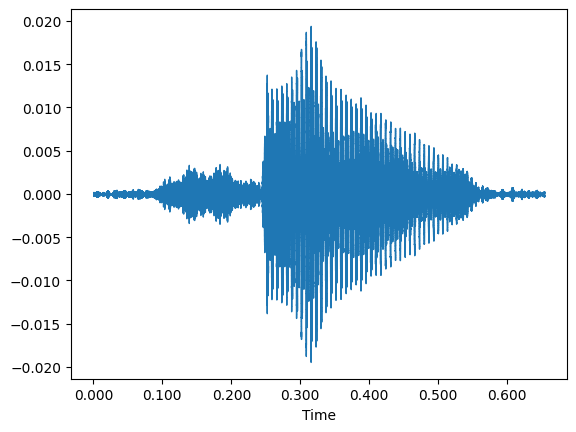

In [6]:
y, sr = librosa.load(X[5])
librosa.display.waveshow(y, sr = sr)

In [16]:
hop_length = 512
n_fft = 255

#make shift time start and end variables
t_start = 0
t_end = 0.6

y_cut = y[int(round(t_start*sr)):int(round(t_end*sr))] #the y values

MFCCs = librosa.feature.mfcc(y=y_cut, n_fft=n_fft,hop_length=hop_length,n_mfcc=128)

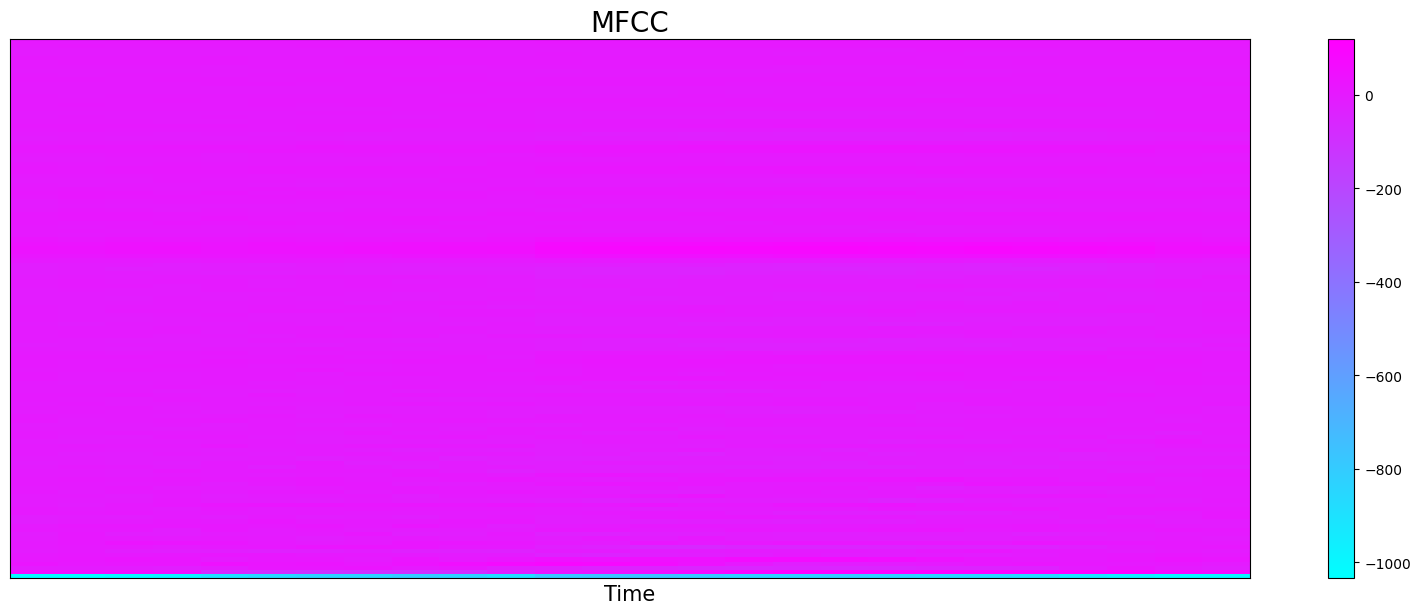

In [17]:
fig, ax = plt.subplots(figsize=(20,7))
librosa.display.specshow(MFCCs,sr=sr, cmap='cool',hop_length=hop_length)
ax.set_xlabel('Time', fontsize=15)
ax.set_title('MFCC', size=20)
plt.colorbar()
plt.show()
